### 1.1 Data Preparation

In [ ]:
import pandas as pd
loandata = pd.read_csv("/home/sharedclass/CreditScoring/loandata.csv")
profileframe = pd.read_csv("/home/sharedclass/CreditScoring/profileframe.csv")
cdrframe = pd.read_csv("/home/sharedclass/CreditScoring/cdrframe.csv")
paymentframe = pd.read_csv("/home/sharedclass/CreditScoring/paymentframe.csv") 

In [ ]:
profileframe.columns = profileframe.columns.str.replace('id', 'ID')

In [ ]:
dummy = pd.get_dummies(loandata, columns=['AGender', 'GCollateralType','AMaritalStatus','AOccupation','AEducation','AHousing'])
dummy

,ID,LStatus,LMaturityDate,LSignDate,LInstallment,LAmount,ABirthDate,AIncome,ANumberChildren,GCollateralAmount,...,AOccupation_SLF,AOccupation_UNI,AEducation_GRAD,AEducation_HIGHER,AEducation_LOWER,AHousing_DEP,AHousing_OTH,AHousing_OWN,AHousing_REN,AHousing_WEL
0,AD10000001,0,20141031,19990910,2000.0,100000.0,NaN,35251.686583,2,0.0,...,0,1,1,0,0,1,0,0,0,0
1,AD10000002,0,20150331,19991210,1250.0,62500.0,NaN,35251.686583,0,0.0,...,0,1,1,0,0,0,0,0,1,0
2,AD10000003,0,20211031,20010610,9900.0,950000.0,NaN,32624.811225,0,0.0,...,0,1,0,0,1,0,0,0,1,0
3,AD10000004,0,20181031,20010702,12560.0,1000000.0,NaN,35251.686583,0,0.0,...,0,1,1,0,0,1,0,0,0,0
4,AD10000005,0,20121031,20010702,1600.0,50000.0,NaN,32624.811225,0,0.0,...,0,1,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16376,AD10016377,0,20160630,20101025,5300.0,314000.0,19510923.0,42300.000000,2,445500.0,...,0,0,0,0,1,1,0,0,0,0
16377,AD10016378,0,20240930,20101025,5100.0,570000.0,19641011.0,46500.000000,1,2088000.0,...,0,0,0,1,0,1,0,0,0,0
16378,AD10016379,1,20300731,20101025,3300.0,400000.0,19850722.0,22600.000000,0,504000.0,...,0,0,1,0,0,0,0,0,1,0
16379,AD10016380,0,20250731,20101025,4400.0,500000.0,19690127.0,32617.268872,0,585000.0,...,0,0,0,0,1,1,0,0,0,0


### 1.2 Drop column

In [ ]:
dummy.drop(columns = ["ID","AMaritalStatus_DIV","AOccupation_GOV", "LMaturityDate", "LSignDate", "LInstallment", "LAmount", "ABirthDate",'AEducation_GRAD', 'GCollateralType_OTH', 'AHousing_DEP','AGender_F'], inplace = True)

### 1.3 Check Missing Value

In [ ]:
dummy.isnull().any()

LStatus                False
AIncome                False
ANumberChildren        False
GCollateralAmount      False
GGuarantorNumber       False
Age                    False
AGender_M              False
GCollateralType_PER    False
GCollateralType_REA    False
GCollateralType_SAV    False
AMaritalStatus_MAR     False
AMaritalStatus_SEP     False
AMaritalStatus_SIN     False
AMaritalStatus_UNR     False
AMaritalStatus_WID     False
AOccupation_MER        False
AOccupation_OTH        False
AOccupation_OWN        False
AOccupation_PRV        False
AOccupation_SLF        False
AOccupation_UNI        False
AEducation_HIGHER      False
AEducation_LOWER       False
AHousing_OTH           False
AHousing_OWN           False
AHousing_REN           False
AHousing_WEL           False
dtype: bool

In [ ]:
profileframe.isnull().any()

ID          False
phonenum    False
paytype     False
province    False
dtype: bool

In [ ]:
cdrframe.isnull().any()

timestamp     False
callingnum    False
callednum     False
duration      False
location      False
dtype: bool

In [ ]:
paymentframe.isnull().any()

timestamp     False
callingnum    False
topup          True
spending       True
balance       False
status        False
dtype: bool

### 1.4 Replace Null with 0

In [ ]:
for cols in paymentframe:
    paymentframe[cols].fillna(0, inplace = True) 
paymentframe

,timestamp,callingnum,topup,spending,balance,status
0,2010-01-01 00:00:13,813452724,0.0,1.0,0,INACTIVE
1,2010-01-01 00:00:37,813725657,0.0,1.0,2,ACTIVE
2,2010-01-01 00:00:46,617935701,0.0,1.0,0,INACTIVE
3,2010-01-01 00:00:57,896380631,363.0,0.0,369,ACTIVE
4,2010-01-01 00:01:24,816643554,85.0,0.0,88,ACTIVE
...,...,...,...,...,...,...
1813834,2010-12-31 23:58:31,614995868,0.0,1.0,88,ACTIVE
1813835,2010-12-31 23:58:47,811693861,0.0,1.0,49,ACTIVE
1813836,2010-12-31 23:58:57,894684878,0.0,1.0,97,ACTIVE
1813837,2010-12-31 23:59:30,817643479,0.0,2.0,177,ACTIVE


### 1.5 Save data to csv

In [ ]:
dummy.to_csv('editdummy.csv', index = False)

In [ ]:
import pandas as pd

editdummy = pd.read_csv("editdummy.csv")
editdummy

,LStatus,AIncome,ANumberChildren,GCollateralAmount,GGuarantorNumber,Age,AGender_M,GCollateralType_PER,GCollateralType_REA,GCollateralType_SAV,...,AOccupation_OWN,AOccupation_PRV,AOccupation_SLF,AOccupation_UNI,AEducation_HIGHER,AEducation_LOWER,AHousing_OTH,AHousing_OWN,AHousing_REN,AHousing_WEL
0,0,35251.686583,2,0.0,2,41.767938,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,35251.686583,0,0.0,2,41.767938,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,32624.811225,0,0.0,2,41.767938,1,1,0,0,...,0,0,0,1,0,1,0,0,1,0
3,0,35251.686583,0,0.0,3,41.767938,1,1,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,32624.811225,0,0.0,3,41.767938,1,1,0,0,...,0,0,0,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16376,0,42300.000000,2,445500.0,1,59.083333,1,0,1,0,...,0,0,0,0,0,1,0,0,0,0
16377,0,46500.000000,1,2088000.0,1,46.000000,1,0,1,0,...,0,1,0,0,1,0,0,0,0,0
16378,1,22600.000000,0,504000.0,1,25.250000,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
16379,0,32617.268872,0,585000.0,1,41.750000,1,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
editdummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16381 entries, 0 to 16380
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   LStatus              16381 non-null  int64  
 1   AIncome              16381 non-null  float64
 2   ANumberChildren      16381 non-null  int64  
 3   GCollateralAmount    16381 non-null  float64
 4   GGuarantorNumber     16381 non-null  int64  
 5   Age                  16381 non-null  float64
 6   AGender_M            16381 non-null  int64  
 7   GCollateralType_PER  16381 non-null  int64  
 8   GCollateralType_REA  16381 non-null  int64  
 9   GCollateralType_SAV  16381 non-null  int64  
 10  AMaritalStatus_MAR   16381 non-null  int64  
 11  AMaritalStatus_SEP   16381 non-null  int64  
 12  AMaritalStatus_SIN   16381 non-null  int64  
 13  AMaritalStatus_UNR   16381 non-null  int64  
 14  AMaritalStatus_WID   16381 non-null  int64  
 15  AOccupation_MER      16381 non-null 

### 1.6 Visualization

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
Train = pd.read_csv("CreditRisk_Train.csv")

In [ ]:
Train

,LStatus,AIncome,ANumberChildren,GCollateralAmount,GGuarantorNumber,Age,AGender_M,GCollateralType_PER,GCollateralType_REA,GCollateralType_SAV,...,AOccupation_OWN,AOccupation_PRV,AOccupation_SLF,AOccupation_UNI,AEducation_HIGHER,AEducation_LOWER,AHousing_OTH,AHousing_OWN,AHousing_REN,AHousing_WEL
0,1.0,26700.000,0.0,0.0,2.0,27.666666,1.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.0,32700.000,1.0,0.0,3.0,27.166666,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,0.0,38900.000,2.0,0.0,2.0,57.166668,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,15400.000,0.0,10736775.0,1.0,36.083332,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.0,38300.000,0.0,0.0,2.0,38.166668,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9824,0.0,29988.244,0.0,0.0,2.0,29.250000,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9825,0.0,35251.688,2.0,0.0,2.0,41.767937,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9826,0.0,39900.000,1.0,0.0,2.0,54.000000,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9827,0.0,31039.424,0.0,0.0,2.0,31.750000,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


#### Occupation

In [ ]:
occup  = {"AOccupation_SLF":"self employ","AOccupation_UNI":'unidentify', "AOccupation_PRV":'private self', 'AOccupation_MER':'employ merchant', "AOccupation_OWN":'own business', "AOccupation_OTH":'other unidentify'}

In [ ]:
base = Train[Train[list(occup.keys())].sum(axis=1) == 0]

In [ ]:
occup_base = []    
S = base['LStatus'].value_counts()
occupation = S[1]/(S[1]+S[0])
occup_base.append(occupation)
occup_base

[0.17086330935251798]

In [ ]:
occup_value = []
for key in occup:
    S = Train[Train[key] == 1.0]['LStatus'].value_counts()
    occupation = S[1]/(S[1]+S[0])
    occup_value.append(occupation)
    occup_value

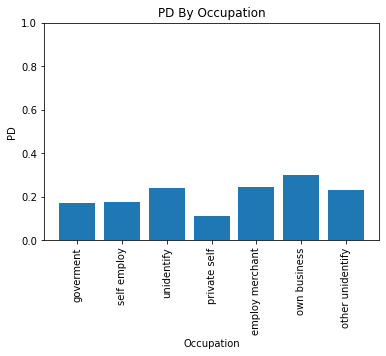

In [ ]:
fig, ax = plt.subplots()
ax.bar(['goverment']+ list(occup.values()), occup_base + occup_value)
ax.set(title = "PD By Occupation", xlabel = "Occupation", ylabel = "PD", ylim = [0, 1])
plt.setp(ax.get_xticklabels(), fontsize=10, rotation='vertical')
plt.show()

#### Collateral Type

In [ ]:
GCollat = {'GCollateralType_PER': 'person', 'GCollateralType_REA':'real estate','GCollateralType_SAV':'saving account'}

In [ ]:
GCollatbase = Train[Train[list(GCollat.keys())].sum(axis=1) == 0]

In [ ]:
GCollat_base = []    
S = GCollatbase['LStatus'].value_counts()
GCollateral = S[1]/(S[1]+S[0])
GCollat_base.append(GCollateral)
GCollat_base

[0.3724137931034483]

In [ ]:
GCollat_value = []
for key in GCollat:
    S = Train[Train[key] == 1.0]['LStatus'].value_counts()
    GCollateral = S[1]/(S[1]+S[0])
    GCollat_value.append(GCollateral)
GCollat_value

[0.15336190731315297, 0.11644951140065146, 0.38181818181818183]

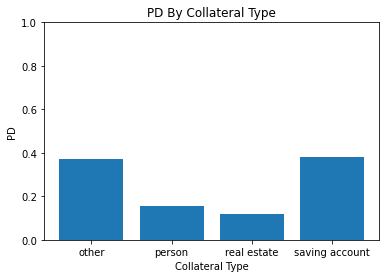

In [ ]:
fig, ax = plt.subplots()
ax.bar(['other']+ list(GCollat.values()), GCollat_base + GCollat_value)
ax.set(title = "PD By Collateral Type", xlabel = "Collateral Type", ylabel = "PD", ylim = [0, 1])
#plt.setp(ax.get_xticklabels(), fontsize=10, rotation='vertical')
plt.show()

#### Education 

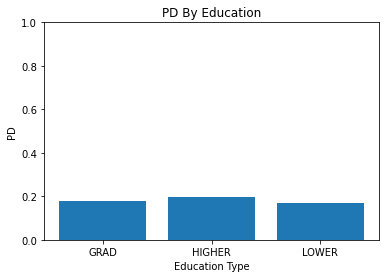

In [ ]:
ed = {'AEducation_HIGHER': 'HIGHER', 'AEducation_LOWER':'LOWER'}
edbase = Train[Train[list(ed.keys())].sum(axis=1) == 0]
ed_base = []    
S = edbase['LStatus'].value_counts()
education = S[1]/(S[1]+S[0])
ed_base.append(education)
ed_value = []
for key in ed:
    S = Train[Train[key] == 1.0]['LStatus'].value_counts()
    education = S[1]/(S[1]+S[0])
    ed_value.append(education)

fig, ax = plt.subplots()
ax.bar(['GRAD']+ list(ed.values()), ed_base + ed_value)
ax.set(title = "PD By Education", xlabel = "Education Type", ylabel = "PD", ylim = [0, 1])
#plt.setp(ax.get_xticklabels(), fontsize=10, rotation='vertical')
plt.show()

#### Marital Status

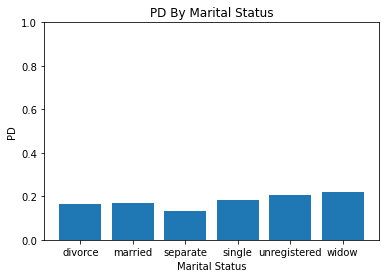

In [ ]:
Marital = {'AMaritalStatus_MAR': 'married', 'AMaritalStatus_SEP':'separate' ,'AMaritalStatus_SIN': 'single','AMaritalStatus_UNR':'unregistered','AMaritalStatus_WID':'widow'} 
Maritalbase = Train[Train[list(Marital.keys())].sum(axis=1) == 0]
Marital_base = []    
S = Maritalbase['LStatus'].value_counts()
Maritalstatus = S[1]/(S[1]+S[0])
Marital_base.append(Maritalstatus)
Marital_value = []
for key in Marital:
    S = Train[Train[key] == 1.0]['LStatus'].value_counts()
    Maritalstatus = S[1]/(S[1]+S[0])
    Marital_value.append(Maritalstatus)

fig, ax = plt.subplots()
ax.bar(['divorce']+ list(Marital.values()), Marital_base + Marital_value)
ax.set(title = "PD By Marital Status", xlabel = "Marital Status", ylabel = "PD", ylim = [0, 1])
#plt.setp(ax.get_xticklabels(), fontsize=10, rotation='vertical')
plt.show()

#### Housing


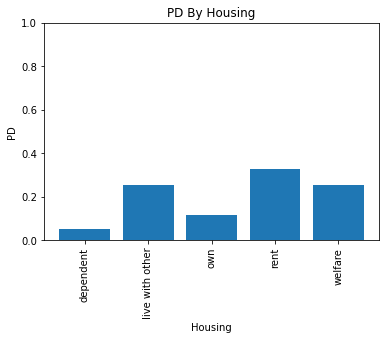

In [ ]:
house = {'AHousing_OTH': 'live with other', 'AHousing_OWN':'own' ,'AHousing_REN': 'rent','AHousing_WEL':'welfare'} 
housebase = Train[Train[list(house.keys())].sum(axis=1) == 0]
house_base = []    
S = housebase['LStatus'].value_counts()
housing = S[1]/(S[1]+S[0])
house_base.append(housing)
house_value = []
for key in house:
    S = Train[Train[key] == 1.0]['LStatus'].value_counts()
    housing = S[1]/(S[1]+S[0])
    house_value.append(housing)

fig, ax = plt.subplots()
ax.bar(['dependent']+ list(house.values()), house_base + house_value)
ax.set(title = "PD By Housing", xlabel = "Housing", ylabel = "PD", ylim = [0, 1])
plt.setp(ax.get_xticklabels(), fontsize=10, rotation='vertical')
plt.show()

#### Age

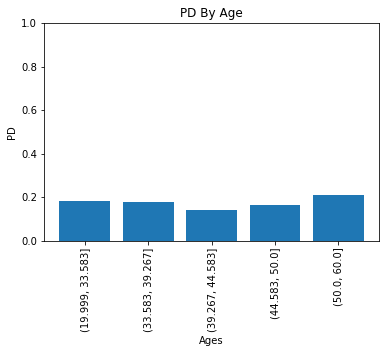

In [ ]:
n_cuts = 5

Train["Age_bin"] = pd.qcut(Train["Age"], n_cuts)
fig, ax = plt.subplots()
x = (Train.groupby("Age_bin")["LStatus"].sum())/(Train.groupby("Age_bin")["LStatus"].count())
x.index = x.index.astype(str)
ax.bar(x.index, x)
ax.set(title = "PD By Age", xlabel = "Ages", ylabel = "PD", ylim = [0, 1])
plt.setp(ax.get_xticklabels(), fontsize=10, rotation='vertical')
plt.show()

#### Income

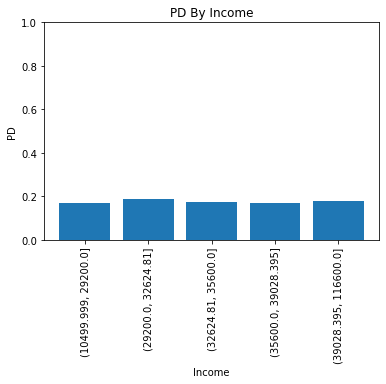

In [ ]:
n_cuts = 5
Train["AIncome_bin"] = pd.qcut(Train["AIncome"], n_cuts)
fig, ax = plt.subplots()
x = (Train.groupby("AIncome_bin")["LStatus"].sum())/(Train.groupby("AIncome_bin")["LStatus"].count())
x.index = x.index.astype(str)
ax.bar(x.index, x)
ax.set(title = "PD By Income", xlabel = "Income", ylabel = "PD", ylim = [0, 1])
plt.setp(ax.get_xticklabels(), fontsize=10, rotation='vertical')
plt.show()

#### Gender Male

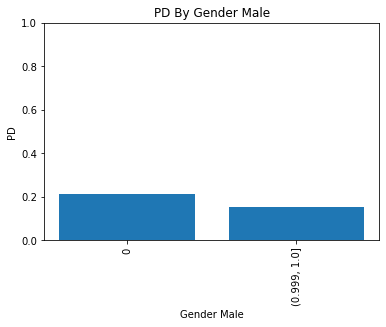

In [ ]:
n_cuts = 1

gen_base = []    
S = Train[Train["AGender_M"] == 0]["LStatus"].value_counts()
genm = S[1]/(S[1]+S[0])
gen_base.append(genm)

Train["AGender_M_bin"] = pd.qcut(Train[Train["AGender_M"] > 0]["AGender_M"], n_cuts)

#Train["AGender_M_bin"] = pd.qcut(Train["AGender_M"], n_cuts) 
fig, ax = plt.subplots()
x = (Train.groupby("AGender_M_bin")["LStatus"].sum())/(Train.groupby("AGender_M_bin")["LStatus"].count()) 
x.index = x.index.astype(str)
#ax.bar(x.index, x)
ax.bar(['0'] + list(x.index), gen_base + list(x.values))
ax.set(title = "PD By Gender Male", xlabel = "Gender Male", ylabel = "PD", ylim = [0, 1])
plt.setp(ax.get_xticklabels(), fontsize=10, rotation='vertical')
plt.show()

#### Guarantor Number


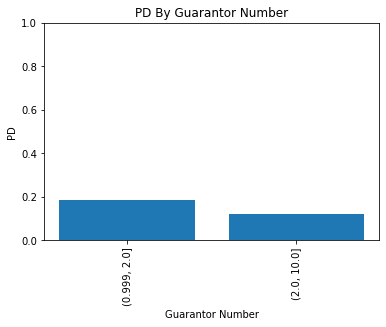

In [ ]:
n_cuts = 2

#Guarantor_base = []    
#S = Train[Train["GGuarantorNumber"] == 0]["LStatus"].value_counts()
#Guarantornum = S[1]/(S[1]+S[0])
#Guarantor_base.append(Guarantornum)

Train["GGuarantorNumber_bin"] = pd.qcut(Train["GGuarantorNumber"], n_cuts)
#Train["GGuarantorNumber_bin"] = pd.qcut(Train[Train["GGuarantorNumber"] > 0]["GGuarantorNumber"], n_cuts)


fig, ax = plt.subplots()
x = (Train.groupby("GGuarantorNumber_bin")["LStatus"].sum())/(Train.groupby("GGuarantorNumber_bin")["LStatus"].count())
x.index = x.index.astype(str)
ax.bar(x.index, x)
#ax.bar(['0'] + list(x.index), Guarantor_base + list(x.values))
ax.set(title = "PD By Guarantor Number", xlabel = "Guarantor Number", ylabel = "PD", ylim = [0, 1])
plt.setp(ax.get_xticklabels(), fontsize=10, rotation='vertical')
plt.show()

####  Number of Children

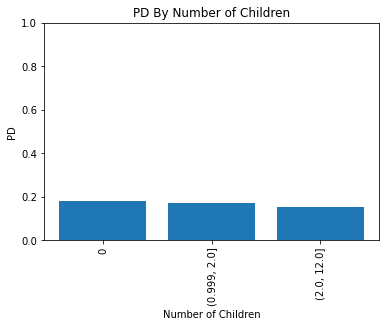

In [ ]:
n_cuts = 2

child_base = []    
S = Train[Train["ANumberChildren"] == 0]["LStatus"].value_counts()
childamount = S[1]/(S[1]+S[0])
child_base.append(childamount)

Train["ANumberChildren_bin"] = pd.qcut(Train[Train["ANumberChildren"] > 0]["ANumberChildren"], n_cuts)
fig, ax = plt.subplots()
x = (Train.groupby("ANumberChildren_bin")["LStatus"].sum())/(Train.groupby("ANumberChildren_bin")["LStatus"].count())
x.index = x.index.astype(str)
#ax.bar(x.index, x)
ax.bar(['0'] + list(x.index), child_base + list(x.values))
ax.set(title = "PD By Number of Children", xlabel = "Number of Children", ylabel = "PD", ylim = [0, 1])
plt.setp(ax.get_xticklabels(), fontsize=10, rotation='vertical')
plt.show()

####  Collateral Amount

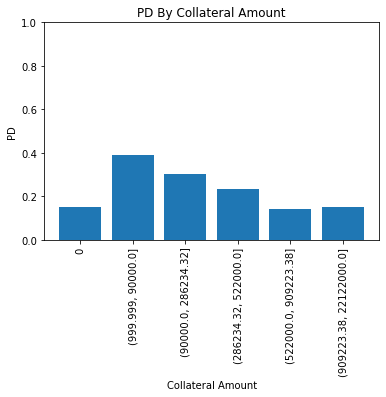

In [ ]:
n_cuts = 5

Collateral_base = []    
S = Train[Train["GCollateralAmount"] == 0]["LStatus"].value_counts()
Collateralamount = S[1]/(S[1]+S[0])
Collateral_base.append(Collateralamount)

#Collateral_value = []
#Collateralamount = pd.qcut(Train[Train["GCollateralAmount"] > 0]["GCollateralAmount"], n_cuts)
#Collateral_value.append(Collateralamount)


Train["GCollateralAmount_bin"] = pd.qcut(Train[Train["GCollateralAmount"] > 0]["GCollateralAmount"], n_cuts)
fig, ax = plt.subplots()
x = (Train.groupby("GCollateralAmount_bin")["LStatus"].sum())/(Train.groupby("GCollateralAmount_bin")["LStatus"].count())
x.index = x.index.astype(str)
#ax.bar(x.index, x)
ax.bar(['0'] + list(x.index), Collateral_base + list(x.values))
ax.set(title = "PD By Collateral Amount", xlabel = "Collateral Amount", ylabel = "PD", ylim = [0, 1])
plt.setp(ax.get_xticklabels(), fontsize=10, rotation='vertical')
plt.show()